In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.constants as sc

# 10

### Случай 1 $E = H/2$  
Кривая траектории:  
$t = -4 \tau + \dfrac{1}{k} \sin k \tau$  
$x = -2 \tau c + \dfrac{2c}{k} \sin k \tau$  
$y = \dfrac{c}{k} \left( \cos k \tau - 1 \right)$  
$k = \Omega \sqrt{3} = \dfrac{eE}{mc}\sqrt{3} $

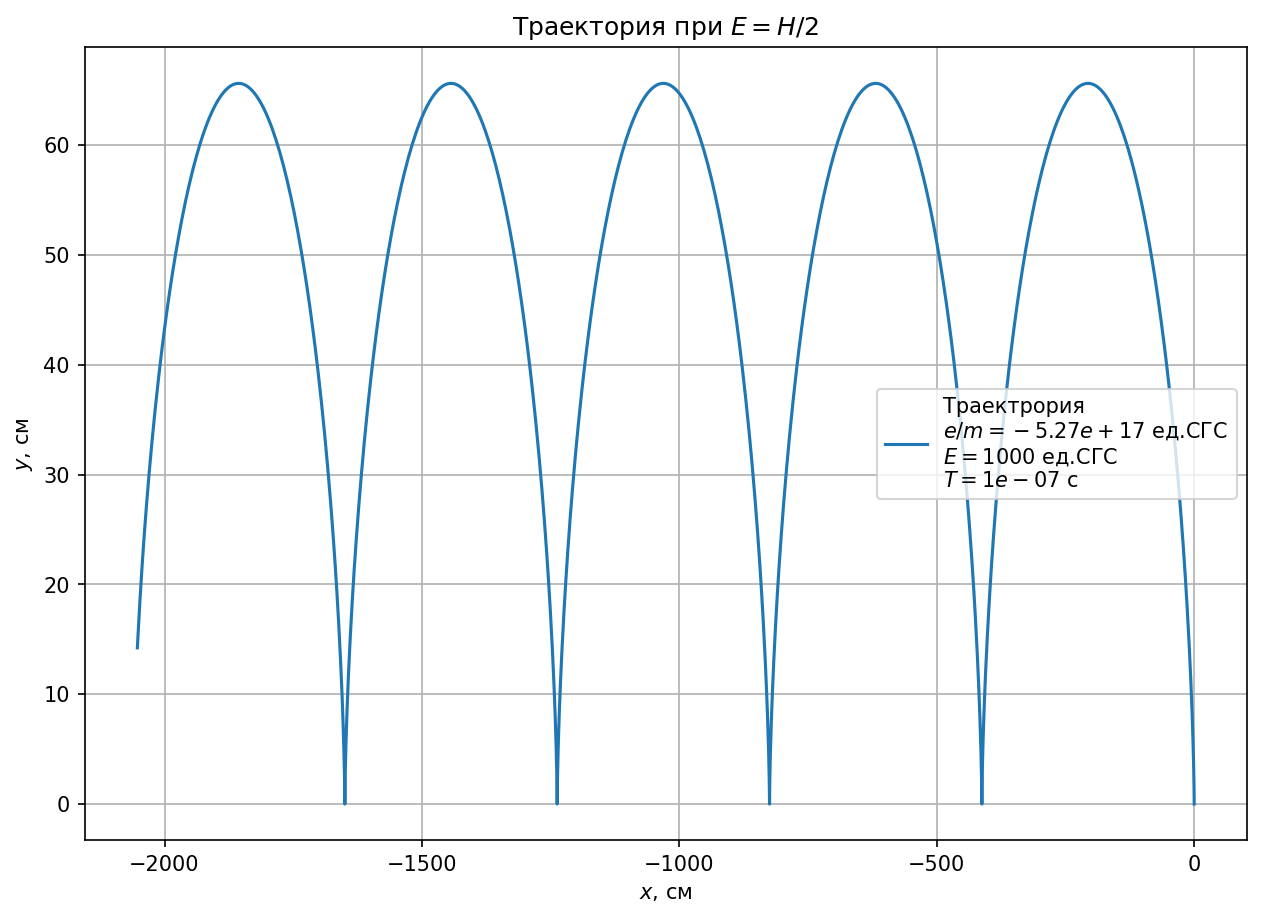

In [10]:
t_max = 1e-7
t = np.linspace(0, t_max, 1000)
em =  -5.27e17 # удельный заряд
c = sc.c * 100 # см/с
E = 1000 # СГС
k = np.sqrt(3) * em * E / (c * 100)
x = 1 / 3 * (- 2 * c * t + 2 * c / k * np.sin(k * t))
y = 1 / 3 * c / k * (np.cos(k * t) - 1)

text = f"Траектрория \n$e/m = {em}$ ед.СГС\n$E = {E}$ ед.СГС \n$T = {t_max}$ c"

plt.figure(figsize=(10, 7), dpi=150,)
plt.grid(True)
plt.plot(x, y, label=text)
plt.ylabel("$y$, см")
plt.xlabel("$x$, см")
plt.title("Траектория при $E = H/2$")
plt.legend()
plt.savefig("teorpol_1.png")

### Случай 2 $E = H$  
Кривая траектории:  
$t = \dfrac{k^2 t^3}{6} + t$  
$x = \dfrac{ck^2t^3}{6}$  
$y = \dfrac{c k t^2}{2}$  
$k = \Omega = \omega = \dfrac{eE}{mc} $

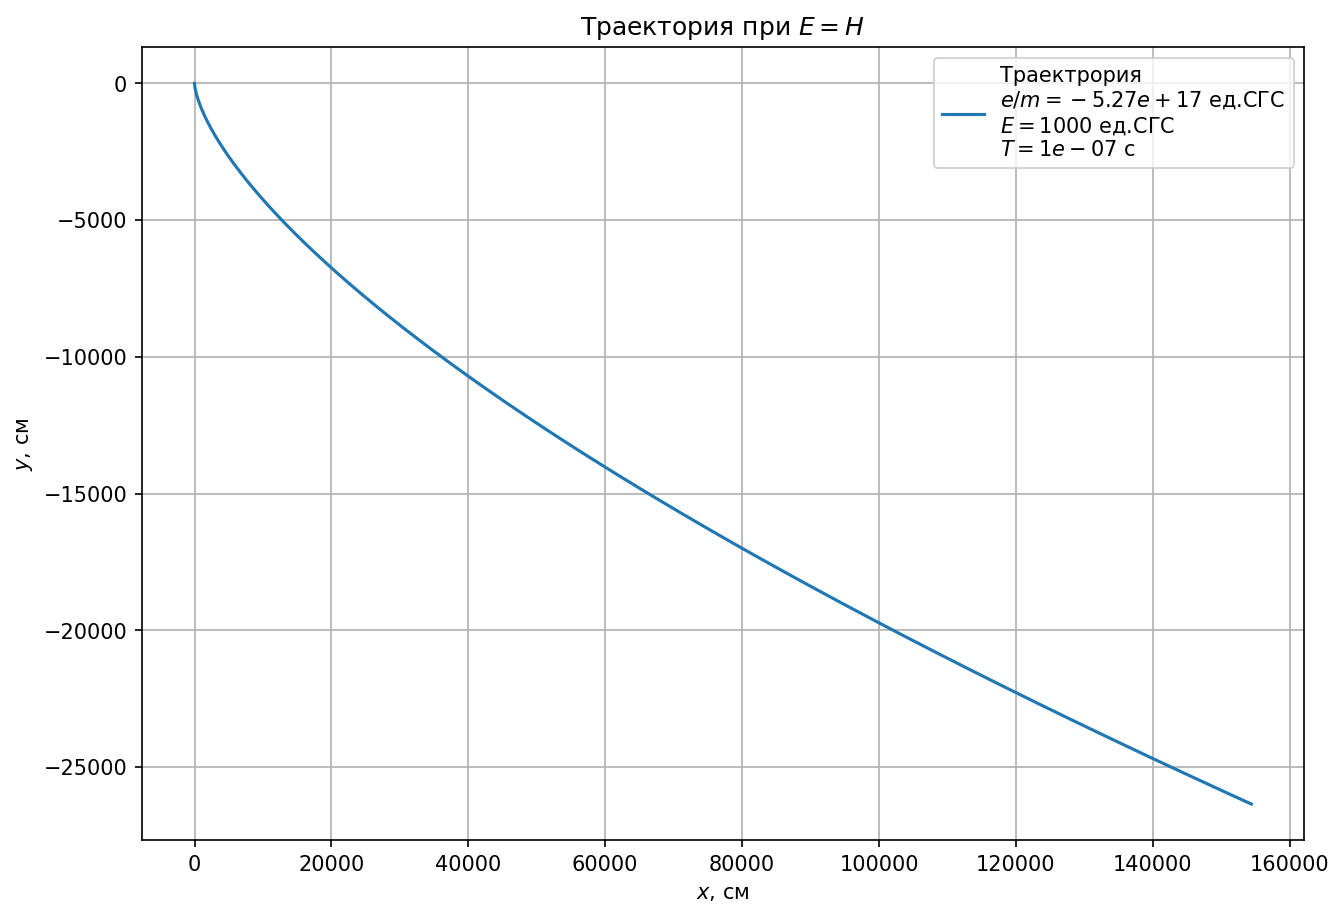

In [9]:
t_max = 1e-7
t = np.linspace(0, t_max, 1000)
em =  -5.27e17 # удельный заряд
c = sc.c * 100 # см/с
E = 1000 # СГС
k = em * E / (c * 100)
x = c * k ** 2 * t ** 3 / 6
y = c * k * t ** 2 / 2

text = f"Траектрория \n$e/m = {em}$ ед.СГС\n$E = {E}$ ед.СГС \n$T = {t_max}$ c"

plt.figure(figsize=(10, 7), dpi=150,)
plt.grid(True)
plt.plot(x, y, label=text)
plt.ylabel("$y$, см")
plt.xlabel("$x$, см")
plt.title("Траектория при $E = H$")
plt.legend()
plt.savefig("teorpol_2.png")

### Случай 3 $E = 2H$  
Кривая траектории:  
$t = -4 \tau + \dfrac{1}{k} \sin k \tau$  
$x = -2 \tau c + \dfrac{2c}{k} \sin k \tau$  
$y = \dfrac{c}{k} \left( \cos k \tau - 1 \right)$  
$k = \Omega \sqrt{3} = \dfrac{eE}{mc}\sqrt{3} $

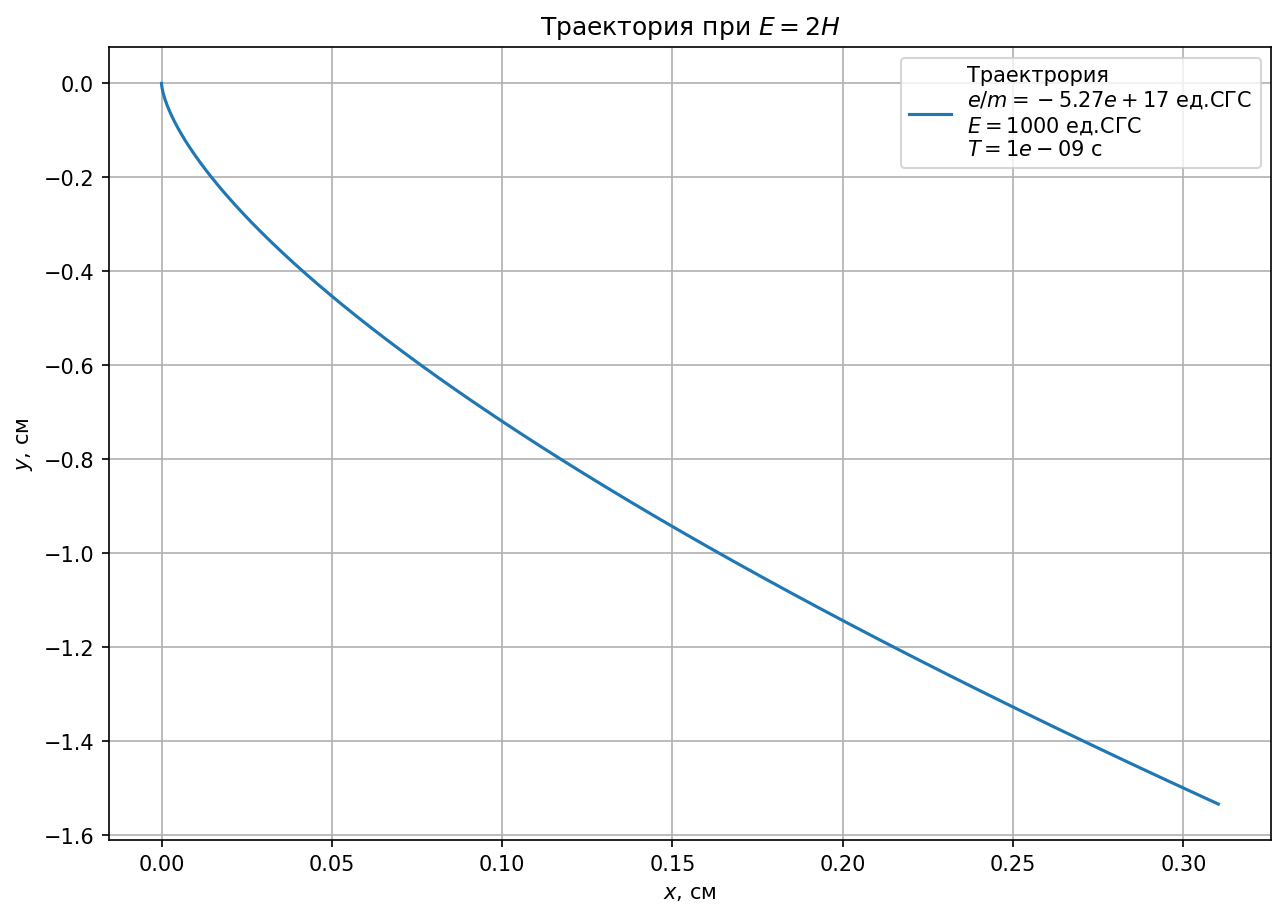

In [8]:
t_max = 1e-9
t = np.linspace(0, t_max, 1000)
em =  -5.27e17 # удельный заряд
c = sc.c * 100 # см/с
E = 1000 # СГС
k = np.sqrt(3) * em * E / (c * 100)
x = 1 / 3 * (- 2 * c * t + 2 * c / k * np.sinh(k * t))
y = 1 / 3 * c / k * (np.cosh(k * t) - 1)

text = f"Траектрория \n$e/m = {em}$ ед.СГС\n$E = {E}$ ед.СГС \n$T = {t_max}$ c"

plt.figure(figsize=(10, 7), dpi=150)
plt.grid(True)
plt.plot(x, y, label=text)
plt.ylabel("$y$, см")
plt.xlabel("$x$, см")
plt.title("Траектория при $E = 2H$")
plt.legend()
plt.savefig("teorpol_3.png")

# 11

In [46]:
def m_field(t, h_0 = 1000, h=-1):
    return h_0 + h * t

def m_field_deriv(t, h = -1):
    return h

def e_field(x, y, t):
    return np.array([y, -x]) * m_field_deriv(t) / (2 * sc.c * 100)

e = 4.8e-10
c = sc.c * 100

def delta_v(x, y, t, E, v):
    return c ** 2 * e / E * e_field(x, y, t) + c * e / E * np.array([v[1], -v[0]]) * m_field(t)

def delta_E(x, y, t, v):
    return e * np.dot(e_field(x, y, t), v)



[1 0] 8.176000000000001e-13


[1. 0.] 8.176000000000001e-13
[ 0.000000e+00 -1.760034e+16]


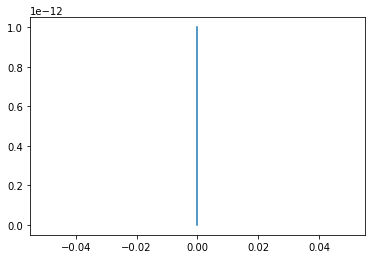

In [60]:
delta_t = 1e-12
v = np.array([1., 0])
E = 0.511 * 1.6e-12 / np.sqrt(1 - np.dot(v_0, v_0) / c ** 2)
print(v, E)

N = 1000
X = np.zeros(2 * N).reshape((N, 2))
t = 0

print(delta_v(0, 0, 0, E, v))

for i in range(1, N):
    X[i] = X[i - 1] + v * delta_t
    dv = delta_v(x[i], y[i], t, E, v)
    dE = delta_E(x[i], y[i], t, v)
    v += dv * delta_t
    E += dE * delta_t
    t += delta_t

plt.plot(X[0], X[1])


# 12

In [5]:
h = 1
h_0 = 2
e = 0
a = 1

x, y, z = np.meshgrid(np.linspace(-1, 1, 7), np.linspace(-1, 1, 7), np.linspace(-1, 1, 7))
Hx = (h - e) * x + a * y
Hy = e * y + a * x
Hz = - h * z + h_0

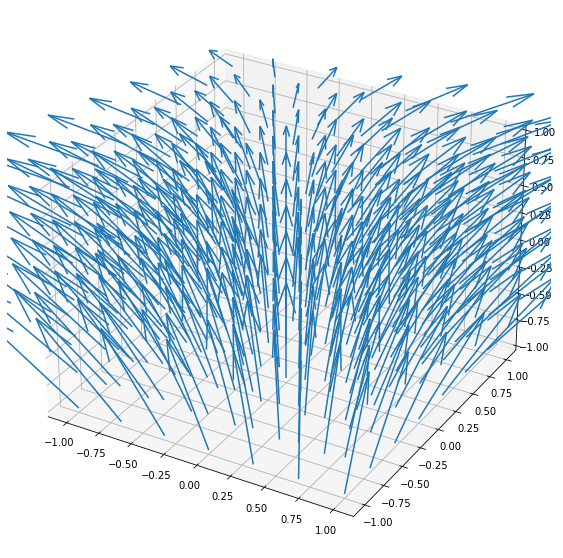

In [6]:
%matplotlib inline
 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.quiver(x, y, z, Hx, Hy, Hz, length=0.3)

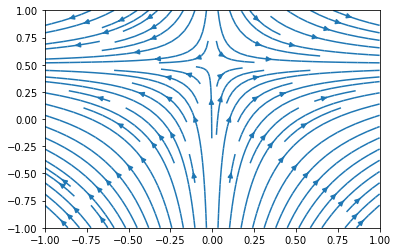

In [7]:
h = 1
e = 0
a = 0

X, Z = np.meshgrid(np.linspace(-1, 1, 21), np.linspace(-1, 1, 21))
HX = h * X
HZ = - h * Z + 0.5

plt.streamplot(X, Z, HX, HZ)